In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abinb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['ID', 'entity', 'sentiment', 'content']


In [19]:
print("Dataset shape:", df.shape)
print("Sample rows:\n", df.head())
print("Value counts:\n", df['sentiment'].value_counts())

Dataset shape: (74682, 4)
Sample rows:
      ID       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Value counts:
 sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [23]:
# Drop rows where 'content' is missing
df = df.dropna(subset=['content'])

# Download stopwords only once
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

# Define cleaning function safely
def clean_tweet(text):
    try:
        text = re.sub(r"http\S+", "", str(text))
        text = re.sub(r"@\w+", "", text)
        text = re.sub(r"#\w+", "", text)
        text = re.sub(r"[^\w\s]", "", text)
        text = text.lower()
        text = " ".join([word for word in text.split() if word not in stop_words])
        return text
    except:
        return ""

# Apply cleaning
df['cleaned'] = df['content'].apply(clean_tweet)


C:\Users\abinb\AppData\Local\Temp\ipykernel_13076\2715869105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


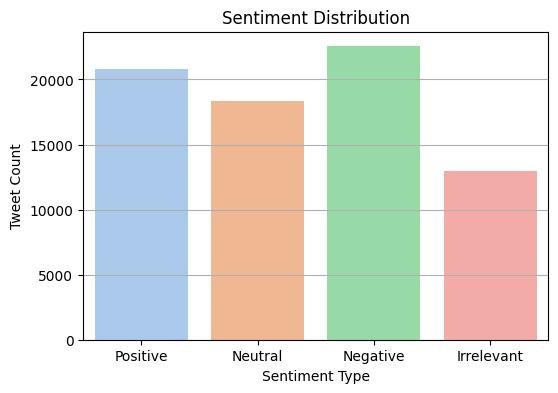

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Tweet Count")
plt.grid(axis='y')
plt.show()

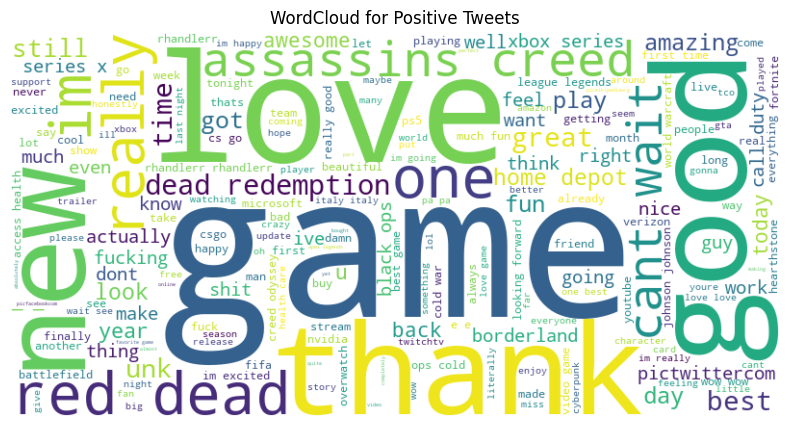

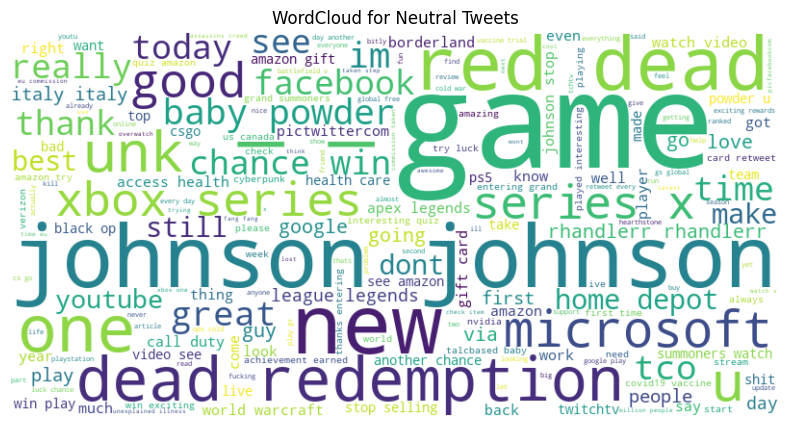

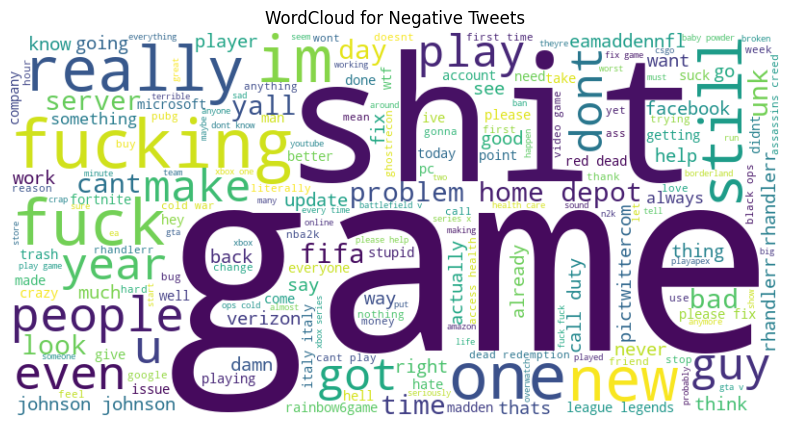

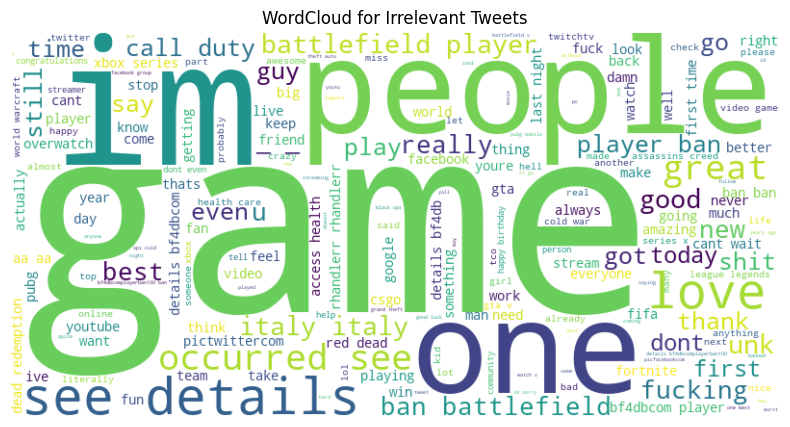

In [26]:
sentiments = df['sentiment'].unique()

for sentiment in sentiments:
    text = " ".join(df[df['sentiment'] == sentiment]['cleaned'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Tweets")
    plt.show()